In [325]:
# *Import libraries*
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.linear_model import LogisticRegression


#ANN
from keras.models import Sequential
from keras.layers import Dense, Dropout



## Importing FIFA 23 Players Dataset

In [326]:
Fifa = pd.read_csv('Fifa 23 Players Data.csv')
Fifa.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [327]:
pd.set_option('display.max_columns', None)
Fifa

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023.0,30.0,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023.0,9.0,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025.0,9.0,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025.0,17.0,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024.0,7.0,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022.0,20.0,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50

In [328]:
## There are NULLS in columns I will drop afterwards
nan_cols = [i for i in Fifa.columns if Fifa[i].isnull().any()]
nan_cols

['Contract Until', 'Club Jersey Number']

In [329]:
Fifa = Fifa[['Full Name', 'Overall', 'Potential','Best Position', 
       'Club Name', 'Attacking Work Rate','Defensive Work Rate', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total']]

As seen above, there are many features in the dataset. However, I will only use those that determine club's attributes, therefore I will make the AVG of each feature grouped by club.

In [330]:
Fifa.columns

Index(['Full Name', 'Overall', 'Potential', 'Best Position', 'Club Name',
       'Attacking Work Rate', 'Defensive Work Rate', 'Shooting Total',
       'Passing Total', 'Dribbling Total', 'Defending Total',
       'Physicality Total'],
      dtype='object')

In [331]:
Fifa.columns = Fifa.columns.str.replace(' ', '')

In [332]:
Fifa.rename(columns={'BestPosition':'Position'}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_37892\3315314661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa.rename(columns={'BestPosition':'Position'}, inplace=True)


I want to simplify the Position column

In [333]:
map_position= {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'RB': 'Defender',
    'LB': 'Defender',
    'RWB': 'Defender',
    'LWB': 'Defender',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'ST': 'Forward',
    'CF': 'Forward',
    'RF': 'Forward',
    'LF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward'
}

In [334]:
Fifa['Position'].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [335]:
Fifa['Position'] = Fifa['Position'].map(map_position)


C:\Users\User\AppData\Local\Temp\ipykernel_37892\2599093403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['Position'] = Fifa['Position'].map(map_position)


Then, Position looks like as follows:

In [336]:
Fifa['Position'].unique()

array(['Midfielder', 'Forward', 'Goalkeeper', 'Defender'], dtype=object)

**Are there any special characters in categorical features?**

In [337]:
Fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FullName           18539 non-null  object
 1   Overall            18539 non-null  int64 
 2   Potential          18539 non-null  int64 
 3   Position           18539 non-null  object
 4   ClubName           18539 non-null  object
 5   AttackingWorkRate  18539 non-null  object
 6   DefensiveWorkRate  18539 non-null  object
 7   ShootingTotal      18539 non-null  int64 
 8   PassingTotal       18539 non-null  int64 
 9   DribblingTotal     18539 non-null  int64 
 10  DefendingTotal     18539 non-null  int64 
 11  PhysicalityTotal   18539 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 1.7+ MB


In [338]:
cat_features = [col for col in Fifa.columns if Fifa[col].dtype == 'object' ]
cat_features

['FullName', 'Position', 'ClubName', 'AttackingWorkRate', 'DefensiveWorkRate']

In [339]:
Fifa[cat_features]

,FullName,Position,ClubName,AttackingWorkRate,DefensiveWorkRate
0,Lionel Messi,Midfielder,Paris Saint-Germain,Low,Low
1,Karim Benzema,Forward,Real Madrid CF,Medium,Medium
2,Robert Lewandowski,Forward,FC Barcelona,High,Medium
3,Kevin De Bruyne,Midfielder,Manchester City,High,High
4,Kylian Mbappé,Forward,Paris Saint-Germain,High,Low
...,...,...,...,...,...
18534,Darren Collins,Midfielder,Sligo Rovers,Medium,Medium
18535,Dejiang Yang,Midfielder,Guangzhou FC,Medium,Medium
18536,Liam Mullan,Midfielder,Derry City,High,Medium
18537,Daithí McCallion,Defender,Derry City,Medium,Medium


### Splitting the data into GoalKeeper & Other to make the analysis stronger (because I want to make feature averages, so if GK and others were together, their means wouldn't be significant )

I'll encode AttackingWorkRate & DefensiveWorkRate. Both LabelEncoder and OrdinalEncoder will start counting by alphabetical order. So, as I want them to be {'low':0,'medium':1,'high':2}, I'll map those values


In [340]:
print(Fifa['AttackingWorkRate'].unique())
print(Fifa['DefensiveWorkRate'].unique())

['Low' 'Medium' 'High']
['Low' 'Medium' 'High']


In [341]:
m = {'Low':0,'Medium':1,'High':2}
Fifa['AttackingWorkRate'] = Fifa['AttackingWorkRate'].map(m)
Fifa['DefensiveWorkRate'] = Fifa['DefensiveWorkRate'].map(m)

Fifa

C:\Users\User\AppData\Local\Temp\ipykernel_37892\3463504756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['AttackingWorkRate'] = Fifa['AttackingWorkRate'].map(m)
C:\Users\User\AppData\Local\Temp\ipykernel_37892\3463504756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fifa['DefensiveWorkRate'] = Fifa['DefensiveWorkRate'].map(m)


,FullName,Overall,Potential,Position,ClubName,AttackingWorkRate,DefensiveWorkRate,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,Lionel Messi,91,91,Midfielder,Paris Saint-Germain,0,0,89,90,94,34,64
1,Karim Benzema,91,91,Forward,Real Madrid CF,1,1,88,83,87,39,78
2,Robert Lewandowski,91,91,Forward,FC Barcelona,2,1,91,79,86,44,83
3,Kevin De Bruyne,91,91,Midfielder,Manchester City,2,2,88,93,87,64,77
4,Kylian Mbappé,91,95,Forward,Paris Saint-Germain,2,0,89,80,92,36,76
...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,Midfielder,Sligo Rovers,1,1,48,43,51,31,33
18535,Dejiang Yang,47,57,Midfielder,Guangzhou FC,1,1,37,41,47,48,39
18536,Liam Mullan,47,67,Midfielder,Derry City,2,1,40,49,52,37,35
18537,Daithí McCallion,47,61,Defender,Derry City,1,1,24,25,32,52,41


In [342]:
Fifa = Fifa.drop('FullName', axis= 1)

In [343]:
Fifa_teams = Fifa.groupby("ClubName").mean().sort_values("Overall", ascending = False).reset_index()
Fifa_teams

C:\Users\User\AppData\Local\Temp\ipykernel_37892\1817402838.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Fifa_teams = Fifa.groupby("ClubName").mean().sort_values("Overall", ascending = False).reset_index()


,ClubName,Overall,Potential,AttackingWorkRate,DefensiveWorkRate,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,FC Bayern München,80.590909,84.727273,1.409091,1.090909,69.000000,73.909091,78.409091,60.454545,73.318182
1,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.500000,73.153846,78.500000,60.384615,70.307692
2,Inter,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385
3,Liverpool,78.666667,83.600000,1.466667,1.400000,63.700000,71.866667,76.066667,62.966667,71.466667
4,Manchester City,78.518519,84.185185,1.518519,1.333333,65.259259,72.148148,76.296296,62.259259,70.703704
...,...,...,...,...,...,...,...,...,...,...
674,Finn Harps,55.520000,59.680000,1.400000,1.360000,41.880000,46.120000,51.640000,44.000000,60.000000
675,Drogheda United,55.074074,59.000000,1.111111,1.037037,46.185185,47.740741,51.703704,44.185185,57.444444
676,UCD AFC,54.409091,61.227273,0.909091,1.045455,46.363636,48.318182,51.409091,43.863636,57.909091
677,NorthEast United FC,54.307692,58.692308,1.269231,1.115385,43.192308,46.653846,51.576923,40.230769,59.769231


***
## Importing League Datasets

In [344]:
uk = pd.read_csv('LeagueEng.csv')
sp = pd.read_csv('LeagueSpa.csv')
it = pd.read_csv('LeagueItal.csv')
ge = pd.read_csv('LeagueGerm.csv')
be = pd.read_csv('LeagueBelg.csv')
fr = pd.read_csv('LeagueFran.csv')
ne = pd.read_csv('LeagueNether.csv')
pt = pd.read_csv('LeaguePort.csv')
tr = pd.read_csv('LeagueTurk.csv')

Importing Club Dictionaries

In [345]:
xls = pd.ExcelFile('Dict.xlsx')

uk_dict = pd.read_excel(xls,'Eng')
#sc_dict = pd.read_excel(xls,'Sco')
sp_dict = pd.read_excel(xls,'Spa')
it_dict = pd.read_excel(xls,'Ita')
ge_dict = pd.read_excel(xls,'Ger')
be_dict = pd.read_excel(xls,'Bel')
fr_dict = pd.read_excel(xls,'Fra')
ne_dict = pd.read_excel(xls,'Net')
pt_dict = pd.read_excel(xls,'Por')
tr_dict = pd.read_excel(xls,'Tur')
#ar_dict = pd.read_excel(xls,'Arg')

In [346]:
uk_dict

,Team,TeamDest
0,Arsenal,Arsenal
1,Aston Villa,Aston Villa
2,Brentford,Brentford
3,Brighton,Brighton & Hove Albion
4,Burnley,Burnley
5,Chelsea,Chelsea
6,Crystal Palace,Crystal Palace
7,Everton,Everton
8,Leeds,Leeds United
9,Leicester,Leicester City


### Mapping ClubNames 

In [347]:
## Spain
sp = pd.merge(sp_dict, sp, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
sp = pd.merge(sp_dict, sp, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

## UK
uk = pd.merge(uk_dict, uk, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
uk = pd.merge(uk_dict, uk, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Scotland
#sc = pd.merge(sc_dict, sc, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
#sc = pd.merge(sc_dict, sc, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Italy
it = pd.merge(it_dict, it, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
it = pd.merge(it_dict, it, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Germany
ge = pd.merge(ge_dict, ge, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
ge = pd.merge(ge_dict, ge, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Belgium
be = pd.merge(be_dict, be, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
be = pd.merge(be_dict, be, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## France
fr = pd.merge(fr_dict, fr, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
fr = pd.merge(fr_dict, fr, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Netherlands
ne = pd.merge(ne_dict, ne, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
ne = pd.merge(ne_dict, ne, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Portugal
pt = pd.merge(pt_dict, pt, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
pt = pd.merge(pt_dict, pt, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Turkey
tr = pd.merge(tr_dict, tr, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
tr = pd.merge(tr_dict, tr, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Argentine
#ar = pd.merge(ar_dict, ar, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
#ar = pd.merge(ar_dict, ar, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])


## Combining all Leagues together

In [348]:
allres = uk.append([be,ge,tr,sp,ne,fr,pt,it])
allres['Div'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_37892\3100187439.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allres = uk.append([be,ge,tr,sp,ne,fr,pt,it])


array(['E0', 'B1', 'D1', 'T1', 'SP1', 'N1', 'F1', 'P1', 'I1'],
      dtype=object)

In [349]:
allres

,TeamDest_x,TeamDest_y,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Unnamed: 105
0,Arsenal,Brentford,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1.0,0.0,H,M Oliver,8.0,22.0,3.0,4.0,12.0,8.0,2.0,5.0,0.0,0.0,0.0,0.0,4.00,3.40,1.95,4.00,3.50,1.95,3.80,3.40,2.05,4.05,3.46,2.05,4.00,3.40,1.90,4.10,3.40,2.00,4.62,3.72,2.10,4.02,3.43,2.02,2.10,1.72,2.22,1.73,2.26,1.83,2.16,1.73,0.50,1.86,2.07,1.88,2.06,2.05,2.08,1.87,2.03,3.80,3.25,2.05,3.80,3.30,2.05,3.80,3.25,2.10,3.94,3.33,2.13,3.90,3.00,2.05,3.90,3.25,2.10,4.20,3.50,2.18,3.89,3.28,2.10,2.37,1.57,2.44,1.62,2.47,1.75,2.33,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09,NaN
1,Leeds United,Manchester United,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1.0,0.0,H,P Tierney,16.0,10.0,8.0,3.0,11.0,9.0,5.0,4.0,1.0,2.0,0.0,0.0,1.53,4.50,5.75,1.53,4.50,5.75,1.55,4.40,5.75,1.56,4.57,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.59,4.65,6.35,1.55,4.48,5.87,1.61,2.30,1.67,2.32,1.71,2.38,1.65,2.29,-1.00,1.95,1.98,1.96,1.96,2.00,2.01,1.93,1.96,1.61,4.20,5.25,1.62,4.10,5.25,1.65,4.20,4.90,1.67,4.20,5.40,1.57,4.20,5.50,1.65,4.10,5.25,1.71,4.33,5.80,1.64,4.19,5.22,1.66,2.20,1.70,2.27,1.75,2.37,1.67,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79,NaN
2,Brighton & Hove Albion,Burnley,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1.0,0.0,H,D Coote,14.0,14.0,3.0,8.0,10.0,7.0,7.0,6.0,2.0,1.0,0.0,0.0,3.10,3.10,2.45,3.20,3.10,2.40,3.15,3.05,2.45,3.30,3.12,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.33,3.20,2.60,3.19,3.09,2.49,2.50,1.53,2.56,1.56,2.56,1.63,2.46,1.57,0.25,1.80,2.14,1.83,2.12,1.83,2.17,1.79,2.12,3.10,3.10,2.45,3.25,3.10,2.40,3.10,3.05,2.45,3.27,3.14,2.51,3.10,3.00,2.45,3.13,3.13,2.50,3.35,3.20,2.56,3.19,3.10,2.48,2.30,1.61,2.33,1.67,2.42,1.71,2.34,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12,NaN
3,Crystal Palace,Chelsea,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2.0,0.0,H,J Moss,13.0,4.0,6.0,1.0,15.0,11.0,5.0,2.0,0.0,0.0,0.0,0.0,1.25,5.75,13.00,1.28,5.75,10.50,1.25,6.00,13.00,1.26,6.24,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.30,6.30,15.00,1.26,5.92,12.80,1.80,2.00,1.80,2.09,1.84,2.12,1.79,2.06,-1.50,1.84,2.09,1.79,2.12,1.93,2.12,1.83,2.07,1.30,5.25,11.00,1.33,5.00,10.00,1.30,5.25,11.00,1.34,5.40,11.00,1.30,5.25,10.00,1.33,5.00,11.00,1.36,5.50,11.50,1.33,5.17,10.58,1.90,1.90,1.93,1.98,1.96,2.07,1.90,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82,NaN
4,Southampton,Everton,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0.0,1.0,A,A Madley,14.0,6.0,6.0,3.0,13.0,15.0,6.0,8.0,2.0,0.0,0.0,0.0,1.90,3.50,4.00,1.95,3.50,3.90,1.95,3.45,3.95,2.01,3.56,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.04,3.66,4.25,1.97,3.53,4.04,2.00,1.80,2.14,1.78,2.14,1.85,2.07,1.79,-0.50,2.00,1.93,2.01,1.92,2.01,1.97,1.96,1.92,2.00,3.40,3.90,2.05,3.40,3.75,2.00,3.35,4.00,2.05,3.45,4.07,1.95,3.40,3.90,2.00,3.30,4.20,2.12,3.50,4.20,2.04,3.39,3.95,2.20,1.66,2.28,1.69,2.34,1.77,2.24,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Napoli,Spezia,I1,22/05/2022,11:30,Spezia,Napoli,0,3,A,0.0,3.0,A,NaN,16.0,10.0,4.0,4.0,10.0,9.0,4.0,2.0,1.0,2.0,0.0,0.0,5

In [350]:
allres = allres[['TeamDest_x','TeamDest_y','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
allres

,TeamDest_x,TeamDest_y,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Arsenal,Brentford,Brentford,Arsenal,2,0,H
1,Leeds United,Manchester United,Man United,Leeds,5,1,H
2,Brighton & Hove Albion,Burnley,Burnley,Brighton,1,2,A
3,Crystal Palace,Chelsea,Chelsea,Crystal Palace,3,0,H
4,Southampton,Everton,Everton,Southampton,3,1,H
...,...,...,...,...,...,...,...
375,Napoli,Spezia,Spezia,Napoli,0,3,A
376,U.C. Sampdoria,Inter,Inter,Sampdoria,3,0,H
377,AC Milan,U.S. Sassuolo Calcio,Sassuolo,Milan,0,3,A
378,Udinese Calcio,US Salernitana 1919,Salernitana,Udinese,0,4,A


## Merging club Stats with League matches

In [351]:
HomeStats = Fifa_teams.add_prefix('Home')
AwayStats = Fifa_teams.add_prefix('Away')
HomeStats

,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal
0,FC Bayern München,80.590909,84.727273,1.409091,1.090909,69.000000,73.909091,78.409091,60.454545,73.318182
1,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.500000,73.153846,78.500000,60.384615,70.307692
2,Inter,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385
3,Liverpool,78.666667,83.600000,1.466667,1.400000,63.700000,71.866667,76.066667,62.966667,71.466667
4,Manchester City,78.518519,84.185185,1.518519,1.333333,65.259259,72.148148,76.296296,62.259259,70.703704
...,...,...,...,...,...,...,...,...,...,...
674,Finn Harps,55.520000,59.680000,1.400000,1.360000,41.880000,46.120000,51.640000,44.000000,60.000000
675,Drogheda United,55.074074,59.000000,1.111111,1.037037,46.185185,47.740741,51.703704,44.185185,57.444444
676,UCD AFC,54.409091,61.227273,0.909091,1.045455,46.363636,48.318182,51.409091,43.863636,57.909091
677,NorthEast United FC,54.307692,58.692308,1.269231,1.115385,43.192308,46.653846,51.576923,40.230769,59.769231


In [352]:
res = pd.merge(allres, HomeStats, 'left', left_on='TeamDest_y', right_on='HomeClubName')
matchStats = pd.merge(res, AwayStats, 'left', left_on='TeamDest_x', right_on='AwayClubName').drop(columns = ['TeamDest_x','TeamDest_y'])
matchStats

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,Brentford,Arsenal,2,0,H,Brentford,71.032258,76.741935,1.354839,1.354839,57.000000,63.064516,67.612903,56.870968,69.096774,Arsenal,74.931034,82.448276,1.379310,1.379310,59.241379,68.551724,73.275862,56.310345,66.379310
1,Man United,Leeds,5,1,H,Manchester United,77.181818,82.636364,1.424242,1.151515,63.333333,70.030303,74.060606,60.151515,71.121212,Leeds United,72.320000,79.960000,1.480000,1.480000,58.320000,65.040000,70.440000,55.080000,69.320000
2,Burnley,Brighton,1,2,A,Burnley,70.100000,75.466667,1.366667,1.233333,57.000000,64.000000,68.933333,56.366667,66.600000,Brighton & Hove Albion,69.206897,78.413793,1.275862,1.034483,54.241379,61.724138,66.413793,55.379310,63.758621
3,Chelsea,Crystal Palace,3,0,H,Chelsea,77.258065,83.387097,1.419355,1.290323,62.709677,70.612903,74.709677,59.967742,69.935484,Crystal Palace,71.655172,77.482759,1.137931,1.344828,58.758621,64.827586,69.344828,58.241379,66.896552
4,Everton,Southampton,3,1,H,Everton,73.516129,78.064516,1.322581,1.387097,60.870968,66.322581,69.322581,58.709677,70.129032,Southampton,71.275862,78.793103,1.448276,1.275862,56.965517,62.413793,68.793103,56.517241,67.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,Spezia,Napoli,0,3,A,Spezia,68.416667,74.375000,1.375000,1.208333,55.666667,61.416667,65.583333,53.333333,66.083333,Napoli,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
3120,Inter,Sampdoria,3,0,H,Inter,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385,U.C. Sampdoria,70.961538,74.576923,1.192308,1.153846,56.346154,62.692308,68.384615,57.384615,67.423077
3121,Sassuolo,Milan,0,3,A,U.S. Sassuolo Calcio,71.354839,77.000000,1.161290,1.032258,58.161290,61.967742,69.838710,53.064516,63.161290,AC Milan,77.312500,82.375000,1.500000,1.250000,65.562500,70.000000,74.375000,60.843750,72.750000
3122,Salernitana,Udinese,0,4,A,US Salernitana 1919,70.218750,74.531250,1.187500,1.093750,57.843750,61.125000,66.906250,53.562500,66.281250,Udinese Calcio,71.080000,76.880000,1.320000,1.400000,55.320000,59.840000,66.320000,57.440000,70.600000


**checking how many clubs are left out without stats (were unable to be matched**)

In [353]:
nan = matchStats[matchStats['HomeClubName'].isna()]
nan['HomeTeam'].unique()

array(['Beerschot VA', 'Yeni Malatyaspor', 'Rizespor', 'Goztep',
       'Heracles', 'Zwolle', 'Willem II', 'Moreirense', 'Tondela',
       'Belenenses'], dtype=object)

In [354]:
nan2 = matchStats[matchStats['AwayClubName'].isna()]
nan2['AwayTeam'].unique()

array(['Beerschot VA', 'Rizespor', 'Goztep', 'Yeni Malatyaspor', 'Zwolle',
       'Heracles', 'Willem II', 'Belenenses', 'Tondela', 'Moreirense'],
      dtype=object)

In [355]:
nan.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
388,Beerschot VA,Cercle Brugge,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KSV Cercle Brugge,66.107143,73.285714,1.250000,1.071429,51.428571,57.285714,63.035714,49.250000,65.178571
399,Beerschot VA,St. Gilloise,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Royale Union Saint-Gilloise,67.920000,72.920000,1.240000,1.240000,54.120000,59.160000,64.160000,53.960000,68.240000
412,Beerschot VA,Standard,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard de Liège,67.250000,73.285714,1.392857,1.178571,54.678571,58.607143,65.035714,49.107143,66.428571
440,Beerschot VA,St Truiden,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sint-Truidense VV,65.080000,70.040000,1.000000,1.160000,53.200000,59.240000,63.160000,50.840000,62.640000
453,Beerschot VA,Eupen,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KAS Eupen,64.607143,72.250000,1.250000,1.142857,52.285714,57.892857,64.500000,47.357143,61.464286


In [356]:
nan2.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
396,Gent,Beerschot VA,2,2,D,KAA Gent,68.821429,73.678571,1.178571,1.357143,56.142857,61.107143,66.142857,53.642857,67.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Club Brugge,Beerschot VA,3,2,H,Club Brugge KV,71.928571,78.535714,1.357143,1.357143,58.714286,62.821429,69.214286,56.000000,71.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,Charleroi,Beerschot VA,5,2,H,Royal Charleroi S.C.,66.538462,73.269231,1.115385,1.461538,52.576923,57.769231,63.423077,53.576923,67.846154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,Oostende,Beerschot VA,3,1,H,KV Oostende,65.892857,72.535714,1.285714,1.285714,53.250000,58.928571,65.214286,49.678571,62.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,Oud-Heverlee Leuven,Beerschot VA,0,0,D,Oud-Heverlee Leuven,67.346154,72.384615,1.346154,1.153846,54.500000,59.307692,64.615385,54.307692,65.269231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Dropping all clubs with NAN in Stats (so were unable to find a match)**
* There were 10 clubs out of 172 --> `5.81%` of clubs were missing a match (by ClubName) in the other Data Source (Fifa Data source)

In [357]:
matchStats=matchStats[~matchStats.isin(nan)].dropna(how = 'all')
matchStats=matchStats[~matchStats.isin(nan2)].dropna(how = 'all')

matchStats

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,Brentford,Arsenal,2.0,0.0,H,Brentford,71.032258,76.741935,1.354839,1.354839,57.000000,63.064516,67.612903,56.870968,69.096774,Arsenal,74.931034,82.448276,1.379310,1.379310,59.241379,68.551724,73.275862,56.310345,66.379310
1,Man United,Leeds,5.0,1.0,H,Manchester United,77.181818,82.636364,1.424242,1.151515,63.333333,70.030303,74.060606,60.151515,71.121212,Leeds United,72.320000,79.960000,1.480000,1.480000,58.320000,65.040000,70.440000,55.080000,69.320000
2,Burnley,Brighton,1.0,2.0,A,Burnley,70.100000,75.466667,1.366667,1.233333,57.000000,64.000000,68.933333,56.366667,66.600000,Brighton & Hove Albion,69.206897,78.413793,1.275862,1.034483,54.241379,61.724138,66.413793,55.379310,63.758621
3,Chelsea,Crystal Palace,3.0,0.0,H,Chelsea,77.258065,83.387097,1.419355,1.290323,62.709677,70.612903,74.709677,59.967742,69.935484,Crystal Palace,71.655172,77.482759,1.137931,1.344828,58.758621,64.827586,69.344828,58.241379,66.896552
4,Everton,Southampton,3.0,1.0,H,Everton,73.516129,78.064516,1.322581,1.387097,60.870968,66.322581,69.322581,58.709677,70.129032,Southampton,71.275862,78.793103,1.448276,1.275862,56.965517,62.413793,68.793103,56.517241,67.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,Spezia,Napoli,0.0,3.0,A,Spezia,68.416667,74.375000,1.375000,1.208333,55.666667,61.416667,65.583333,53.333333,66.083333,Napoli,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
3120,Inter,Sampdoria,3.0,0.0,H,Inter,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385,U.C. Sampdoria,70.961538,74.576923,1.192308,1.153846,56.346154,62.692308,68.384615,57.384615,67.423077
3121,Sassuolo,Milan,0.0,3.0,A,U.S. Sassuolo Calcio,71.354839,77.000000,1.161290,1.032258,58.161290,61.967742,69.838710,53.064516,63.161290,AC Milan,77.312500,82.375000,1.500000,1.250000,65.562500,70.000000,74.375000,60.843750,72.750000
3122,Salernitana,Udinese,0.0,4.0,A,US Salernitana 1919,70.218750,74.531250,1.187500,1.093750,57.843750,61.125000,66.906250,53.562500,66.281250,Udinese Calcio,71.080000,76.880000,1.320000,1.400000,55.320000,59.840000,66.320000,57.440000,70.600000


In [358]:
nan = matchStats[matchStats['HomeClubName'].isna()]
nan['HomeTeam'].unique()

array([], dtype=object)

In [359]:
nan2 = matchStats[matchStats['AwayClubName'].isna()]
nan2['AwayTeam'].unique()

array([], dtype=object)

Categorisation of match results: Home Win as 1, Away Win as 2, Draw as 0



In [360]:
matchStats['FTR']= matchStats['FTR'].replace(['H','A','D'],[1,2,0])

Now remove club names from the table to just to have the pure data for the remaining part of the process

In [361]:
matchStats = matchStats.drop(columns=['HomeTeam','AwayTeam','HomeClubName','AwayClubName','FTHG','FTAG'])
matchStats

,FTR,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,1,71.032258,76.741935,1.354839,1.354839,57.000000,63.064516,67.612903,56.870968,69.096774,74.931034,82.448276,1.379310,1.379310,59.241379,68.551724,73.275862,56.310345,66.379310
1,1,77.181818,82.636364,1.424242,1.151515,63.333333,70.030303,74.060606,60.151515,71.121212,72.320000,79.960000,1.480000,1.480000,58.320000,65.040000,70.440000,55.080000,69.320000
2,2,70.100000,75.466667,1.366667,1.233333,57.000000,64.000000,68.933333,56.366667,66.600000,69.206897,78.413793,1.275862,1.034483,54.241379,61.724138,66.413793,55.379310,63.758621
3,1,77.258065,83.387097,1.419355,1.290323,62.709677,70.612903,74.709677,59.967742,69.935484,71.655172,77.482759,1.137931,1.344828,58.758621,64.827586,69.344828,58.241379,66.896552
4,1,73.516129,78.064516,1.322581,1.387097,60.870968,66.322581,69.322581,58.709677,70.129032,71.275862,78.793103,1.448276,1.275862,56.965517,62.413793,68.793103,56.517241,67.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,2,68.416667,74.375000,1.375000,1.208333,55.666667,61.416667,65.583333,53.333333,66.083333,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
3120,1,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385,70.961538,74.576923,1.192308,1.153846,56.346154,62.692308,68.384615,57.384615,67.423077
3121,2,71.354839,77.000000,1.161290,1.032258,58.161290,61.967742,69.838710,53.064516,63.161290,77.312500,82.375000,1.500000,1.250000,65.562500,70.000000,74.375000,60.843750,72.750000
3122,2,70.218750,74.531250,1.187500,1.093750,57.843750,61.125000,66.906250,53.562500,66.281250,71.080000,76.880000,1.320000,1.400000,55.320000,59.840000,66.320000,57.440000,70.600000


<AxesSubplot: >

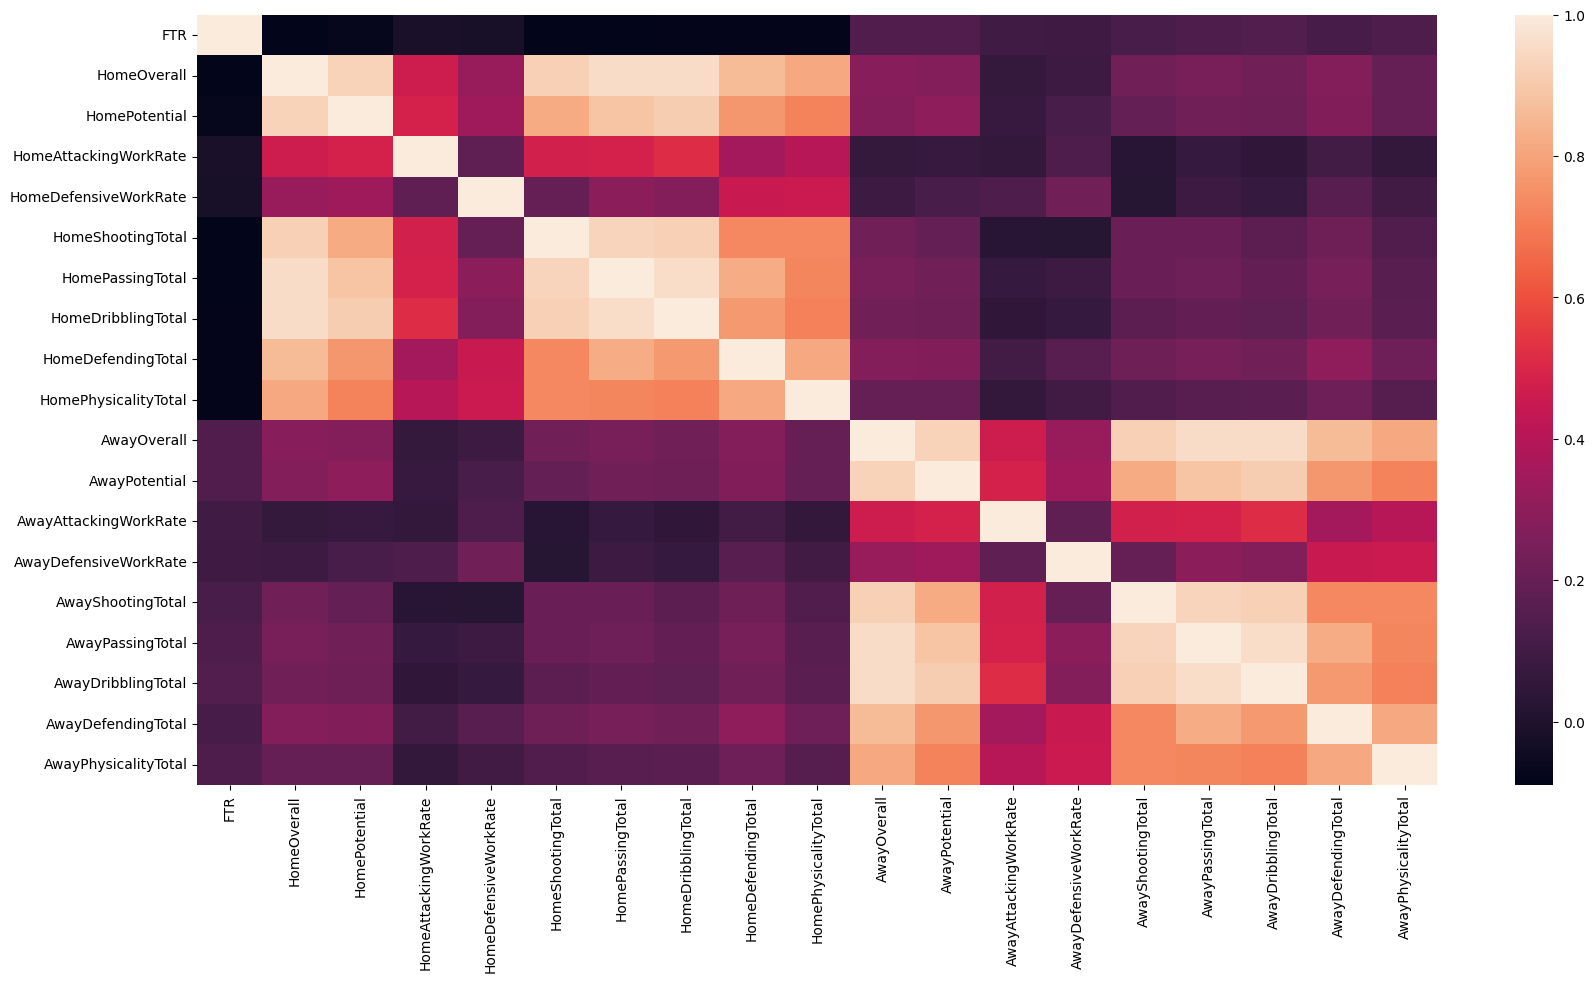

In [362]:
## Further cleaning -- > Heatmap to see which columns are most correlated with the target column
## Correlation Matrix
corr_mat = matchStats.corr(numeric_only=True)
corr_matfig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_mat)

In [363]:
matchStats.isna().sum()

FTR                      0
HomeOverall              0
HomePotential            0
HomeAttackingWorkRate    0
HomeDefensiveWorkRate    0
HomeShootingTotal        0
HomePassingTotal         0
HomeDribblingTotal       0
HomeDefendingTotal       0
HomePhysicalityTotal     0
AwayOverall              0
AwayPotential            0
AwayAttackingWorkRate    0
AwayDefensiveWorkRate    0
AwayShootingTotal        0
AwayPassingTotal         0
AwayDribblingTotal       0
AwayDefendingTotal       0
AwayPhysicalityTotal     0
dtype: int64

In [364]:
## Checking what the FTR (target) looks like
matchStats['FTR'].value_counts()

1    1182
2     891
0     717
Name: FTR, dtype: int64

***
# **ML**
![](Champions-League-Predictions-2023.jpg)
***

## **Data Splitting**

In [365]:
X = matchStats.iloc[:,1:]
y = matchStats.iloc[:,0]

## **Standardization**

In [366]:
col_names = list(X.columns)
scaler = StandardScaler()
X_norm= scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=col_names) 

In [367]:
X_norm

,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,0.099563,0.127752,0.590450,1.771217,-0.262861,0.009120,-0.134781,0.702064,0.783011,1.085066,1.576637,0.801652,1.974912,0.289784,1.283810,1.292280,0.569018,-0.160071
1,1.654002,1.624394,1.189437,0.078813,1.298716,1.627287,1.490035,1.480597,1.485582,0.425069,0.944844,1.670650,2.813022,0.062605,0.468029,0.577645,0.277035,0.860481
2,-0.136086,-0.196048,0.692531,0.759843,-0.262861,0.226435,0.197966,0.582384,-0.083481,-0.361838,0.552250,-0.091155,-0.895329,-0.943040,-0.302253,-0.436956,0.348067,-1.069567
3,1.673275,1.815011,1.147255,1.234204,1.144944,1.762626,1.653600,1.436984,1.074081,0.257019,0.315853,-1.281564,1.687888,0.170753,0.418685,0.301663,1.027287,0.019435
4,0.727417,0.463566,0.312048,2.039724,0.691583,0.765975,0.296056,1.138423,1.141251,0.161140,0.648560,1.396856,1.113840,-0.271363,-0.142045,0.162628,0.618118,0.186974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,-0.561586,-0.473231,0.764452,0.551751,-0.591614,-0.373679,-0.646231,-0.137481,-0.262788,1.668709,1.208908,-0.055442,-0.849405,1.048864,1.146351,1.706601,1.416161,1.235289
2786,2.298307,1.628833,-0.480327,1.058643,1.633791,1.816811,1.833376,2.905058,2.871739,0.081687,-0.421961,-0.812268,0.098216,-0.424076,-0.077345,0.059690,0.823962,0.202163
2787,0.181103,0.193277,-1.079962,-0.913847,0.023472,-0.245663,0.426120,-0.201276,-1.276868,1.687035,1.558032,1.843260,0.898571,1.848350,1.620247,1.569262,1.644877,2.050845
2788,-0.106069,-0.433558,-0.853760,-0.402006,-0.054822,-0.441434,-0.312857,-0.083095,-0.194102,0.111631,0.162808,0.289776,2.147126,-0.677090,-0.739942,-0.460592,0.837105,1.304698


In [368]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=32)

# **K-Nearest Neighbourgh**

**Finding out what's the best number of K (hyperparameter tuning)**

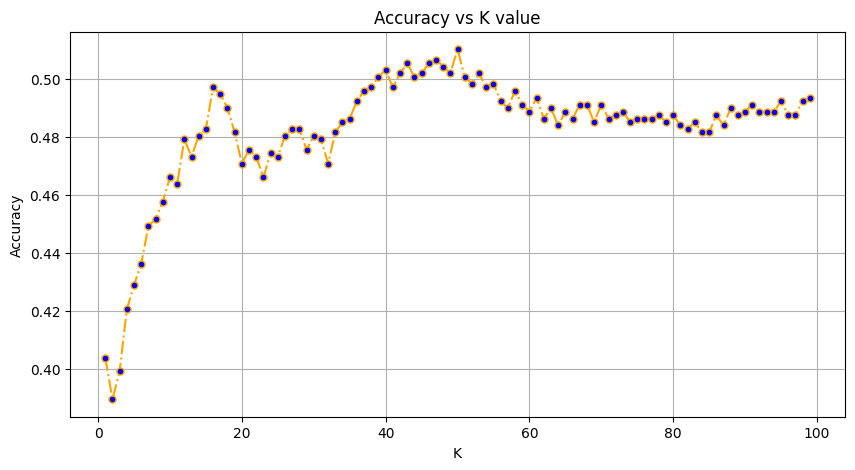

In [369]:
acc = []
for i in range(1,100):
    modelll = KNeighborsClassifier(n_neighbors=i)
    modelll.fit(X_train, y_train)
    y_pred_knn = modelll.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred_knn)
    acc.append(accuracy)

plt.figure(figsize=(10,5))
plt.plot(range(1,100),acc ,color = 'orange', linestyle = 'dashdot', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K value')
plt.show()

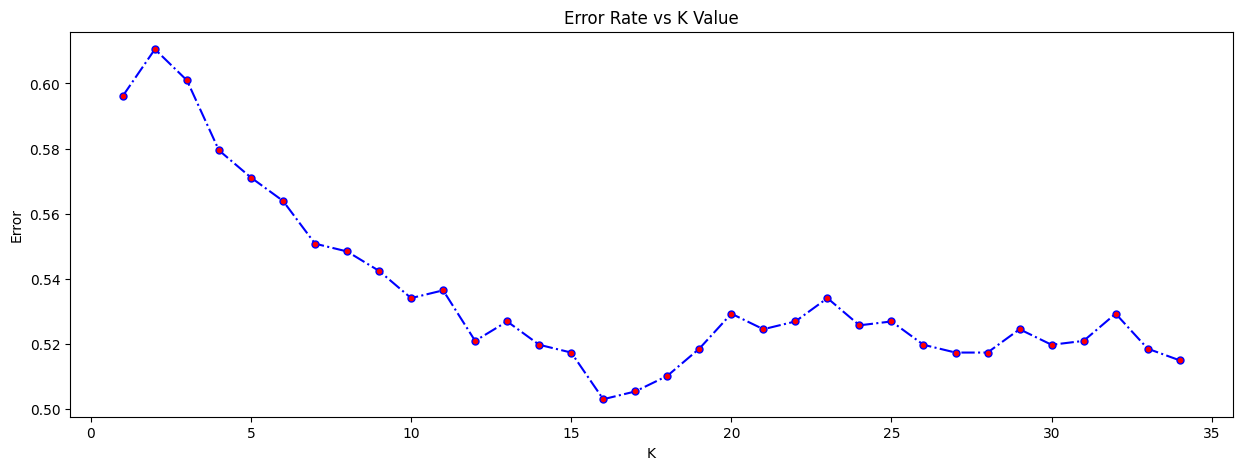

In [370]:
error = []
for i in range(1,35):
    modell = KNeighborsClassifier(n_neighbors=i)
    modell.fit(X_train, y_train)
    y_pred_knn = modell.predict(X_test)
    error.append(np.mean(y_pred_knn != y_test))

plt.figure(figsize=(15,5))
plt.plot(range(1,35), error, color = 'blue', linestyle = 'dashdot', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

**According to the above graphs, the best k=132, because gives the minimal error and maximum accuracy score**

In [371]:
knn_model = KNeighborsClassifier(n_neighbors=16)

#train and test
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [372]:
y_pred_knn = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)


In [373]:
accuracy_sc = accuracy_score(y_test, y_pred_knn)
print("Accruracy:", round(accuracy_sc,3))

Accruracy: 0.497


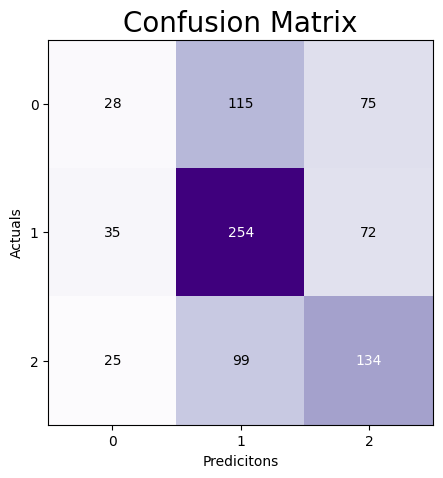

In [374]:
# Confusion Matrix
cMatrix = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat =  cMatrix, figsize = (5,5), cmap = plt.cm.Purples)
plt.xlabel('Predicitons', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [375]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.32      0.13      0.18       218
           1       0.54      0.70      0.61       361
           2       0.48      0.52      0.50       258

    accuracy                           0.50       837
   macro avg       0.45      0.45      0.43       837
weighted avg       0.46      0.50      0.47       837



In [376]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_rf)
print(accuracy)


0.4755077658303465


## MultiClass ROC Curve --> OvR

In [377]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [378]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [379]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

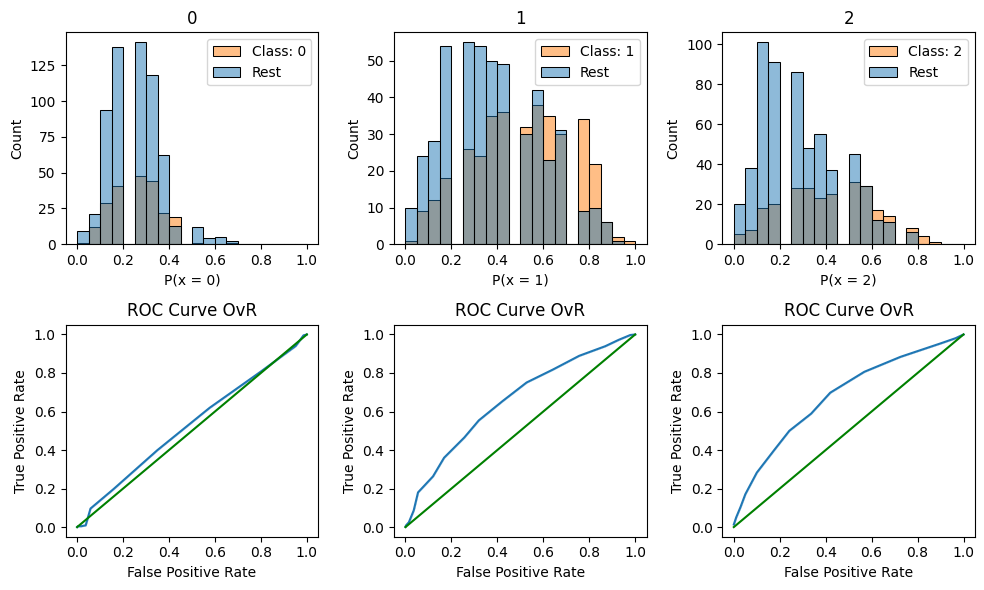

In [380]:

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (10, 6))
bins = [i/20 for i in range(20)] + [1]
classes = knn_model.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()


***

In [381]:
# knn = KNeighborsClassifier()
# from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 200))
# param_grid = dict(n_neighbors=k_range)


In [382]:
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# grid

In [383]:
# grid_search=grid.fit(X_train, y_train)


In [384]:
#print(grid_search.best_params_)

In [385]:
#accuracy = grid_search.best_score_ 
#print("Accuracy for our training dataset with tuning is : {:.3f}".format(accuracy) )


In [386]:
# knn_model = KNeighborsClassifier(n_neighbors=43)

# #train and test
# knn_model.fit(X_train, y_train)

# y_pred_knn = knn_model.predict(X_test)
# y_proba = knn_model.predict_proba(X_test)

# accuracy_sc = accuracy_score(y_test, y_pred_knn)
# print("Accruracy:", round(accuracy_sc,3))

***

## Which model and corresponding parameters should I use?

In [387]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {'C': [1,5,10],
#                     'kernel': ['rbf','linear','sigmoid']
#                     }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {'n_estimators': [1,5,10]}
#     },
#     'DecisionTreeClassifier' : {
#         'model': DecisionTreeClassifier(),
#         'params': {'criterion': ['gini','entropy'],
#                     'random_state': [10,50,100],
#                     'max_depth': [1,3,5,7],
#                     'min_samples_leaf':[1,3,5,7]} 
#     }
# }

In [388]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

The best model, according to the above table, would be SVM, but I think this works best with linear problem, and I think my problem does not have a linear approach. So I will use DecisionTreeClassifier model

***
I need to bring 2022/2023 Champions League groups
***

In [389]:
cl = pd.read_excel('CLGroups.xlsx')
table1=pd.merge(cl, HomeStats,'left', left_on='HomeTeam',right_on='HomeClubName')
clmatches=pd.merge(table1, AwayStats,'left',left_on='AwayTeam',right_on='AwayClubName')
clmatches

,Group,HomeTeam,AwayTeam,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,A,Ajax,Rangers FC,Ajax,74.370370,81.259259,1.296296,1.148148,60.851852,68.222222,72.666667,58.666667,71.259259,Rangers FC,70.740741,75.629630,1.407407,1.074074,61.814815,64.629630,68.703704,52.888889,67.666667
1,A,Napoli,Liverpool,Napoli,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000,Liverpool,78.666667,83.600000,1.466667,1.400000,63.700000,71.866667,76.066667,62.966667,71.466667
2,A,Liverpool,Ajax,Liverpool,78.666667,83.600000,1.466667,1.400000,63.700000,71.866667,76.066667,62.966667,71.466667,Ajax,74.370370,81.259259,1.296296,1.148148,60.851852,68.222222,72.666667,58.666667,71.259259
3,A,Rangers FC,Napoli,Rangers FC,70.740741,75.629630,1.407407,1.074074,61.814815,64.629630,68.703704,52.888889,67.666667,Napoli,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
4,A,Ajax,Napoli,Ajax,74.370370,81.259259,1.296296,1.148148,60.851852,68.222222,72.666667,58.666667,71.259259,Napoli,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,H,Paris Saint-Germain,Juventus,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.500000,73.153846,78.500000,60.384615,70.307692,Juventus,77.354839,82.451613,1.354839,1.193548,66.483871,68.387097,75.129032,58.161290,71.645161
80,H,Juventus,SL Benfica,Juventus,77.354839,82.451613,1.354839,1.193548,66.483871,68.387097,75.129032,58.161290,71.645161,SL Benfica,75.290323,80.774194,1.354839,1.193548,62.580645,66.451613,72.483871,59.548387,71.483871
81,H,Paris Saint-Germain,SL Benfica,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.500000,73.153846,78.500000,60.384615,70.307692,SL Benfica,75.290323,80.774194,1.354839,1.193548,62.580645,66.451613,72.483871,59.548387,71.483871
82,H,SL Benfica,Juventus,SL Benfica,75.290323,80.774194,1.354839,1.193548,62.580645,66.451613,72.483871,59.548387,71.483871,Juventus,77.354839,82.451613,1.354839,1.193548,66.483871,68.387097,75.129032,58.161290,71.645161


In [390]:
clmatches=clmatches.drop(['HomeClubName','AwayClubName'],axis=1)


In [391]:
scaler.fit(clmatches.iloc[:,3:])
scaled_feat=scaler.transform(clmatches.iloc[:,3:])
Xcl=pd.DataFrame(scaled_feat,columns = list(clmatches.iloc[:,3:].columns))

predcl=knn_model.predict(Xcl)

In [392]:
clmatches['Results']=predcl
clresults=clmatches[['Group','HomeTeam','AwayTeam','Results']]
clresults['Homepts']=0
clresults['Awaypts']=0
clresults['Homepts'][clresults['Results']==1]=3
clresults['Awaypts'][clresults['Results']==2]=3
clresults['Homepts'][clresults['Results']==0]=1
clresults['Awaypts'][clresults['Results']==0]=1
clresults
# #clresults[clresults['Group']=='A']


C:\Users\User\AppData\Local\Temp\ipykernel_37892\2811382480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts']=0
C:\Users\User\AppData\Local\Temp\ipykernel_37892\2811382480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Awaypts']=0
C:\Users\User\AppData\Local\Temp\ipykernel_37892\2811382480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Group,HomeTeam,AwayTeam,Results,Homepts,Awaypts
0,A,Ajax,Rangers FC,1,3,0
1,A,Napoli,Liverpool,1,3,0
2,A,Liverpool,Ajax,1,3,0
3,A,Rangers FC,Napoli,2,0,3
4,A,Ajax,Napoli,2,0,3
...,...,...,...,...,...,...
79,H,Paris Saint-Germain,Juventus,1,3,0
80,H,Juventus,SL Benfica,0,1,1
81,H,Paris Saint-Germain,SL Benfica,1,3,0
82,H,SL Benfica,Juventus,0,1,1


In [393]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
hpts = clresults[['Group','HomeTeam','Homepts']].groupby(['Group','HomeTeam']).sum().reset_index()
apts = clresults[['Group','AwayTeam','Awaypts']].groupby(['Group','AwayTeam']).sum().reset_index()


In [394]:
clpred = pd.concat([hpts, apts], axis=1)
clpred['Totalpts'] = clpred['Homepts'] + clpred['Awaypts']
clpred.drop(['Homepts','AwayTeam','Awaypts'],axis= 1, inplace=True)
clpred = clpred.loc[:,~clpred.columns.duplicated()]
clpred = clpred.groupby(['Group','HomeTeam']).sum()
#clpred.sort_values(['Group','Totalpts'],ascending=False).groupby('Group')
clpred.sort_values(['Group','Totalpts'], ascending=False)

Totalpts
Group HomeTeam                        
H     Paris Saint-Germain            9
      Juventus                       5
      SL Benfica                     2
G     Manchester City                9
      Sevilla FC                     6
      Borussia Dortmund              3
F     RB Leipzig                    16
      Real Madrid CF                13
      Celtic                         6
      Shakhtar Donetsk               0
E     AC Milan                      15
      Chelsea                       15
      FC Red Bull Salzburg           6
      Dinamo Zagreb                  0
D     Tottenham Hotspur             16
      Sporting CP                   13
      Eintracht Frankfurt            4
      Olympique de Marseille         1
C     FC Bayern München             15
      Inter                         12
      FC Barcelona                   9
      FC Viktoria Plzeň              0
B     Bayer 04 Leverkusen           13
      Atlético de Madrid            10
      Club Brugge KV                 5
      FC Porto                       5
A     Liverpool                     15
      Napoli                        13
      Ajax                           7
      Rangers FC                     0

In [395]:
cl_groups = clpred.sort_values(['Group','Totalpts'],ascending=False).groupby('Group').head(2)
cl_groups

Totalpts
Group HomeTeam                     
H     Paris Saint-Germain         9
      Juventus                    5
G     Manchester City             9
      Sevilla FC                  6
F     RB Leipzig                 16
      Real Madrid CF             13
E     AC Milan                   15
      Chelsea                    15
D     Tottenham Hotspur          16
      Sporting CP                13
C     FC Bayern München          15
      Inter                      12
B     Bayer 04 Leverkusen        13
      Atlético de Madrid         10
A     Liverpool                  15
      Napoli                     13

***
## **Knock out**

In [396]:
#cl_groups.reset_index()
first = cl_groups.groupby('Group').head(1).reset_index()
first = first[["HomeTeam"]]
first.rename(columns={'HomeTeam':'First'}, inplace=True)
first

,First
0,Paris Saint-Germain
1,Manchester City
2,RB Leipzig
3,AC Milan
4,Tottenham Hotspur
5,FC Bayern München
6,Bayer 04 Leverkusen
7,Liverpool


In [397]:
second = cl_groups.sort_values(['Group','Totalpts','HomeTeam'],ascending=[True,True,False]).groupby('Group').head(1).reset_index()
second = second[["HomeTeam"]]
second.rename(columns={'HomeTeam':'Second'}, inplace=True)
second


,Second
0,Napoli
1,Atlético de Madrid
2,Inter
3,Sporting CP
4,Chelsea
5,Real Madrid CF
6,Sevilla FC
7,Juventus


In [398]:
# Shuffling the order
second = second.reindex(np.random.permutation(second.index))
second = second.reset_index().iloc[:,1:]
second

,Second
0,Sporting CP
1,Atlético de Madrid
2,Sevilla FC
3,Chelsea
4,Inter
5,Napoli
6,Juventus
7,Real Madrid CF


In [399]:
roundof16matches = pd.concat([first,second],axis=1).sort_index()
roundof16matches


,First,Second
0,Paris Saint-Germain,Sporting CP
1,Manchester City,Atlético de Madrid
2,RB Leipzig,Sevilla FC
3,AC Milan,Chelsea
4,Tottenham Hotspur,Inter
5,FC Bayern München,Napoli
6,Bayer 04 Leverkusen,Juventus
7,Liverpool,Real Madrid CF


*** 
# **ML Binary Classification Problem**
because for knock out rounds I need just Win and Loss (0,1)

In [400]:
binary = matchStats.query('FTR!=0')
binary

,FTR,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,1,71.032258,76.741935,1.354839,1.354839,57.000000,63.064516,67.612903,56.870968,69.096774,74.931034,82.448276,1.379310,1.379310,59.241379,68.551724,73.275862,56.310345,66.379310
1,1,77.181818,82.636364,1.424242,1.151515,63.333333,70.030303,74.060606,60.151515,71.121212,72.320000,79.960000,1.480000,1.480000,58.320000,65.040000,70.440000,55.080000,69.320000
2,2,70.100000,75.466667,1.366667,1.233333,57.000000,64.000000,68.933333,56.366667,66.600000,69.206897,78.413793,1.275862,1.034483,54.241379,61.724138,66.413793,55.379310,63.758621
3,1,77.258065,83.387097,1.419355,1.290323,62.709677,70.612903,74.709677,59.967742,69.935484,71.655172,77.482759,1.137931,1.344828,58.758621,64.827586,69.344828,58.241379,66.896552
4,1,73.516129,78.064516,1.322581,1.387097,60.870968,66.322581,69.322581,58.709677,70.129032,71.275862,78.793103,1.448276,1.275862,56.965517,62.413793,68.793103,56.517241,67.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1,74.724138,79.034483,1.344828,1.241379,62.620690,68.793103,73.689655,59.068966,69.517241,77.354839,82.451613,1.354839,1.193548,66.483871,68.387097,75.129032,58.161290,71.645161
3119,2,68.416667,74.375000,1.375000,1.208333,55.666667,61.416667,65.583333,53.333333,66.083333,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
3120,1,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385,70.961538,74.576923,1.192308,1.153846,56.346154,62.692308,68.384615,57.384615,67.423077
3121,2,71.354839,77.000000,1.161290,1.032258,58.161290,61.967742,69.838710,53.064516,63.161290,77.312500,82.375000,1.500000,1.250000,65.562500,70.000000,74.375000,60.843750,72.750000


In [401]:
map_FTR = {1:0, 2:1}
binary['FTR'] = binary['FTR'].map(map_FTR)
binary

C:\Users\User\AppData\Local\Temp\ipykernel_37892\1903730983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary['FTR'] = binary['FTR'].map(map_FTR)


,FTR,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,0,71.032258,76.741935,1.354839,1.354839,57.000000,63.064516,67.612903,56.870968,69.096774,74.931034,82.448276,1.379310,1.379310,59.241379,68.551724,73.275862,56.310345,66.379310
1,0,77.181818,82.636364,1.424242,1.151515,63.333333,70.030303,74.060606,60.151515,71.121212,72.320000,79.960000,1.480000,1.480000,58.320000,65.040000,70.440000,55.080000,69.320000
2,1,70.100000,75.466667,1.366667,1.233333,57.000000,64.000000,68.933333,56.366667,66.600000,69.206897,78.413793,1.275862,1.034483,54.241379,61.724138,66.413793,55.379310,63.758621
3,0,77.258065,83.387097,1.419355,1.290323,62.709677,70.612903,74.709677,59.967742,69.935484,71.655172,77.482759,1.137931,1.344828,58.758621,64.827586,69.344828,58.241379,66.896552
4,0,73.516129,78.064516,1.322581,1.387097,60.870968,66.322581,69.322581,58.709677,70.129032,71.275862,78.793103,1.448276,1.275862,56.965517,62.413793,68.793103,56.517241,67.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0,74.724138,79.034483,1.344828,1.241379,62.620690,68.793103,73.689655,59.068966,69.517241,77.354839,82.451613,1.354839,1.193548,66.483871,68.387097,75.129032,58.161290,71.645161
3119,1,68.416667,74.375000,1.375000,1.208333,55.666667,61.416667,65.583333,53.333333,66.083333,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
3120,0,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385,70.961538,74.576923,1.192308,1.153846,56.346154,62.692308,68.384615,57.384615,67.423077
3121,1,71.354839,77.000000,1.161290,1.032258,58.161290,61.967742,69.838710,53.064516,63.161290,77.312500,82.375000,1.500000,1.250000,65.562500,70.000000,74.375000,60.843750,72.750000


In [402]:
X = binary.iloc[:,1:]
y = binary.iloc[:,0]

col_names = list(X.columns)
scaler = StandardScaler()
X_norm= scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=col_names) 

## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=32)

## Logistic Regression

In [403]:
## Train the logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)


In [404]:
accuracy_LR = accuracy_score(y_test, pred_LR)
print("Accuracy:", round(accuracy_LR,3))

Accuracy: 0.684


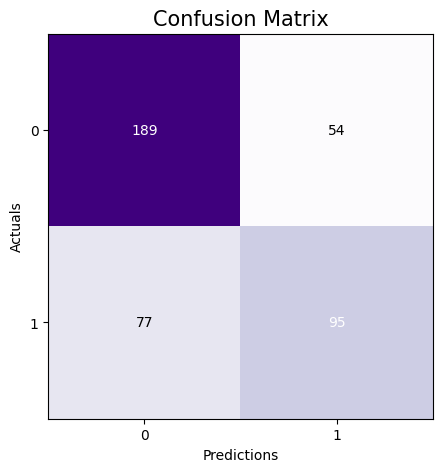

In [405]:
# Plotting a confusion matrix
cm = confusion_matrix(y_test, pred_LR)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap = plt.cm.Purples)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [406]:
print(classification_report(y_test, pred_LR),'\n')
auc = roc_auc_score(y_test, pred_LR)
print('AUC: %f' %auc)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       243
           1       0.64      0.55      0.59       172

    accuracy                           0.68       415
   macro avg       0.67      0.67      0.67       415
weighted avg       0.68      0.68      0.68       415
 

AUC: 0.665052


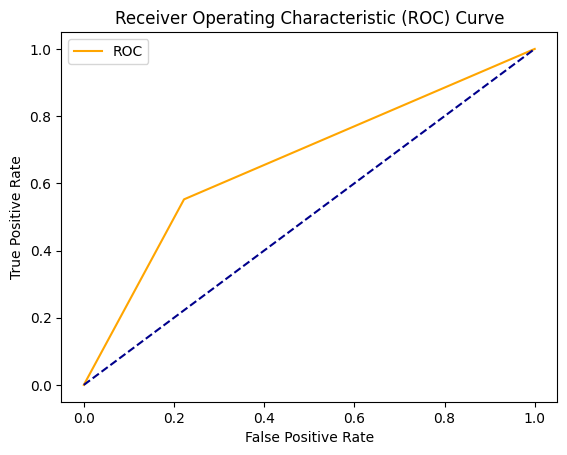

In [407]:
fpr, tpr = roc_curve(y_test, pred_LR)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## I can now apply this new binary model (LR) to the knock out matches

In [408]:
table1=pd.merge(roundof16matches, HomeStats,'left', left_on='First',right_on='HomeClubName')
rounfof16total=pd.merge(table1, AwayStats,'left',left_on='Second',right_on='AwayClubName')

rounfof16total

,First,Second,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,Paris Saint-Germain,Sporting CP,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.500000,73.153846,78.500000,60.384615,70.307692,Sporting CP,73.451613,81.000000,1.387097,1.064516,61.419355,65.774194,72.354839,55.000000,67.387097
1,Manchester City,Atlético de Madrid,Manchester City,78.518519,84.185185,1.518519,1.333333,65.259259,72.148148,76.296296,62.259259,70.703704,Atlético de Madrid,75.515152,81.090909,1.242424,1.272727,63.757576,68.393939,71.636364,58.575758,70.939394
2,RB Leipzig,Sevilla FC,RB Leipzig,77.708333,81.916667,1.375000,1.166667,63.583333,70.041667,75.625000,59.041667,70.708333,Sevilla FC,76.200000,79.766667,1.300000,1.100000,63.966667,69.900000,72.866667,58.466667,68.800000
3,AC Milan,Chelsea,AC Milan,77.312500,82.375000,1.500000,1.250000,65.562500,70.000000,74.375000,60.843750,72.750000,Chelsea,77.258065,83.387097,1.419355,1.290323,62.709677,70.612903,74.709677,59.967742,69.935484
4,Tottenham Hotspur,Inter,Tottenham Hotspur,76.516129,82.161290,1.483871,1.290323,62.387097,68.354839,73.548387,63.741935,70.903226,Inter,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385
5,FC Bayern München,Napoli,FC Bayern München,80.590909,84.727273,1.409091,1.090909,69.000000,73.909091,78.409091,60.454545,73.318182,Napoli,77.240000,81.000000,1.280000,1.040000,62.320000,67.960000,74.920000,59.880000,70.400000
6,Bayer 04 Leverkusen,Juventus,Bayer 04 Leverkusen,75.689655,81.034483,1.448276,1.137931,62.896552,68.827586,75.241379,56.689655,68.793103,Juventus,77.354839,82.451613,1.354839,1.193548,66.483871,68.387097,75.129032,58.161290,71.645161
7,Liverpool,Real Madrid CF,Liverpool,78.666667,83.600000,1.466667,1.400000,63.700000,71.866667,76.066667,62.966667,71.466667,Real Madrid CF,76.705882,83.911765,1.323529,1.205882,64.352941,69.882353,74.382353,55.205882,68.088235


In [409]:
rounfof16total=rounfof16total.drop(['HomeClubName','AwayClubName'],axis=1)

## Standard Scaler
scaler.fit(rounfof16total.iloc[:,2:])
scaled_feat1=scaler.transform(rounfof16total.iloc[:,2:])
Xcl=pd.DataFrame(scaled_feat1,columns = list(rounfof16total.iloc[:,2:].columns))
Xcl



,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,1.115829,0.965917,-1.267347,-0.412050,1.159876,1.115398,1.519825,-0.195413,-0.611593,-1.929656,-0.687254,1.112738,-1.239132,-1.558664,-2.030031,-1.175153,-1.208779,-1.279051
1,0.272824,0.929284,1.399267,1.027158,0.126035,0.585297,0.175974,0.691271,-0.313015,-0.697026,-0.618426,-1.192114,1.004115,0.030431,-0.365705,-1.711939,-0.107948,0.286753
2,-0.256966,-0.893775,-1.458832,-0.673724,-0.647210,-0.525022,-0.233393,-0.830613,-0.309524,-0.287941,-1.621019,-0.274845,-0.856832,0.172533,0.591096,-0.792756,-0.141533,-0.656262
3,-0.515806,-0.525443,1.030480,0.176717,0.265945,-0.546984,-0.995662,0.021752,1.229816,0.344081,1.120033,1.626658,1.193686,-0.681739,1.044004,0.584192,0.320587,-0.155757
4,-1.036562,-0.697187,0.709278,0.588221,-1.199134,-1.414143,-1.499743,1.392560,-0.162583,1.821121,0.564884,-1.377796,0.966444,0.665691,1.192188,1.117187,2.225038,2.127473
5,1.627984,1.364924,-0.779929,-1.446852,1.851951,1.513485,1.464388,-0.162337,1.658204,0.333291,-0.687254,-0.593475,-1.503266,-0.946570,-0.641387,0.741328,0.293575,0.048996
6,-1.577003,-1.602728,0.000420,-0.966980,-0.964080,-1.164960,-0.467331,-1.943087,-1.753536,0.401888,0.411772,0.598819,0.151050,1.883268,-0.370052,0.897500,-0.235546,0.597846
7,0.369699,0.459009,0.366663,1.707511,-0.593382,0.436930,0.035942,1.025867,0.262231,0.014242,1.517263,0.100014,0.283935,0.435051,0.579885,0.339642,-1.145396,-0.969999


In [410]:
predcl=model_LR.predict(Xcl)

In [411]:
rounfof16total['Results']=predcl
rounfof16total=rounfof16total[['First','Second','Results']]
rounfof16total

,First,Second,Results
0,Paris Saint-Germain,Sporting CP,0
1,Manchester City,Atlético de Madrid,0
2,RB Leipzig,Sevilla FC,0
3,AC Milan,Chelsea,1
4,Tottenham Hotspur,Inter,1
5,FC Bayern München,Napoli,0
6,Bayer 04 Leverkusen,Juventus,1
7,Liverpool,Real Madrid CF,0


In [412]:
rounfof16total['quarterfinal'] = 0
rounfof16total['quarterfinal'][rounfof16total['Results']==0]=rounfof16total.loc[:,'First'].values
rounfof16total['quarterfinal'][rounfof16total['Results']==1]=rounfof16total.loc[:,'Second'].values

quarterfinal = rounfof16total[['quarterfinal']]
quarterfinal

C:\Users\User\AppData\Local\Temp\ipykernel_37892\3972922664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rounfof16total['quarterfinal'][rounfof16total['Results']==0]=rounfof16total.loc[:,'First'].values


,quarterfinal
0,Paris Saint-Germain
1,Manchester City
2,RB Leipzig
3,Chelsea
4,Inter
5,FC Bayern München
6,Juventus
7,Liverpool


In [413]:
second = quarterfinal.iloc[1::2].reset_index().iloc[:,1:]
first = quarterfinal.iloc[::2].reset_index().iloc[:,1:]
print(first)
print(second)



          quarterfinal
0  Paris Saint-Germain
1           RB Leipzig
2                Inter
3             Juventus
        quarterfinal
0    Manchester City
1            Chelsea
2  FC Bayern München
3          Liverpool


In [414]:
quarterfinal = pd.concat([first,second],axis=1)
quarterfinal.set_axis(['First','Second'], axis=1, inplace=True)
quarterfinal



C:\Users\User\AppData\Local\Temp\ipykernel_37892\1906127098.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  quarterfinal.set_axis(['First','Second'], axis=1, inplace=True)


,First,Second
0,Paris Saint-Germain,Manchester City
1,RB Leipzig,Chelsea
2,Inter,FC Bayern München
3,Juventus,Liverpool


In [415]:
table1=pd.merge(quarterfinal, HomeStats,'left', left_on='First',right_on='HomeClubName')
quarterfinal=pd.merge(table1, AwayStats,'left',left_on='Second',right_on='AwayClubName')
quarterfinal

,First,Second,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,Paris Saint-Germain,Manchester City,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.500000,73.153846,78.500000,60.384615,70.307692,Manchester City,78.518519,84.185185,1.518519,1.333333,65.259259,72.148148,76.296296,62.259259,70.703704
1,RB Leipzig,Chelsea,RB Leipzig,77.708333,81.916667,1.375000,1.166667,63.583333,70.041667,75.625000,59.041667,70.708333,Chelsea,77.258065,83.387097,1.419355,1.290323,62.709677,70.612903,74.709677,59.967742,69.935484
2,Inter,FC Bayern München,Inter,79.730769,82.653846,1.230769,1.269231,64.692308,70.846154,75.423077,66.153846,75.115385,FC Bayern München,80.590909,84.727273,1.409091,1.090909,69.000000,73.909091,78.409091,60.454545,73.318182
3,Juventus,Liverpool,Juventus,77.354839,82.451613,1.354839,1.193548,66.483871,68.387097,75.129032,58.161290,71.645161,Liverpool,78.666667,83.600000,1.466667,1.400000,63.700000,71.866667,76.066667,62.966667,71.466667


In [416]:
quarterfinal=quarterfinal.drop(['HomeClubName','AwayClubName'],axis=1)

## Standard Scaler
scaler.fit(quarterfinal.iloc[:,2:])
scaled_feat1=scaler.transform(quarterfinal.iloc[:,2:])
Xclquarters=pd.DataFrame(scaled_feat1,columns = list(quarterfinal.iloc[:,2:].columns))
Xclquarters

,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,1.027683,1.645249,0.780800,-0.342286,1.270665,1.483274,1.717365,-0.176792,-0.863946,-0.201509,0.401687,1.499795,0.474691,0.038468,0.011854,-0.055994,0.683952,-0.519532
1,-0.836575,-1.040573,0.625392,-1.010686,-1.301148,-0.329384,-0.401044,-0.607890,-0.652432,-1.259719,-1.122741,-0.784392,0.101386,-1.027311,-1.293102,-1.254338,-1.165997,-1.131384
2,0.959374,-0.184979,-1.705729,1.662916,-0.572959,0.139182,-0.549829,1.675180,1.674221,1.538360,1.437128,-1.020817,-1.629392,1.602177,1.508653,1.539761,-0.772999,1.562782
3,-1.150483,-0.419697,0.299537,-0.309944,0.603441,-1.293071,-0.766492,-0.890498,-0.157844,-0.077132,-0.716075,0.305413,1.053314,-0.613335,-0.227405,-0.229429,1.255044,0.088134


In [417]:
predcl=model_LR.predict(Xclquarters)

quarterfinal['Results']=predcl
quarterfinal=quarterfinal[['First','Second','Results']]
quarterfinal

,First,Second,Results
0,Paris Saint-Germain,Manchester City,0
1,RB Leipzig,Chelsea,0
2,Inter,FC Bayern München,1
3,Juventus,Liverpool,1


In [418]:
quarterfinal['semifinal'] = 0
quarterfinal['semifinal'][quarterfinal['Results']==0]=quarterfinal.loc[:,'First'].values
quarterfinal['semifinal'][quarterfinal['Results']==1]=quarterfinal.loc[:,'Second'].values

semifinal = quarterfinal[['semifinal']]
semifinal

C:\Users\User\AppData\Local\Temp\ipykernel_37892\3289854116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterfinal['semifinal'][quarterfinal['Results']==0]=quarterfinal.loc[:,'First'].values


,semifinal
0,Paris Saint-Germain
1,RB Leipzig
2,FC Bayern München
3,Liverpool


In [419]:
second = semifinal.iloc[1::2].reset_index().iloc[:,1:]
first = semifinal.iloc[::2].reset_index().iloc[:,1:]
print(first)
print(second)

             semifinal
0  Paris Saint-Germain
1    FC Bayern München
    semifinal
0  RB Leipzig
1   Liverpool


In [420]:
semifinal = pd.concat([first,second],axis=1)
semifinal.set_axis(['First','Second'], axis=1, inplace=True)
semifinal

C:\Users\User\AppData\Local\Temp\ipykernel_37892\3696612706.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  semifinal.set_axis(['First','Second'], axis=1, inplace=True)


,First,Second
0,Paris Saint-Germain,RB Leipzig
1,FC Bayern München,Liverpool


In [421]:
table1=pd.merge(semifinal, HomeStats,'left', left_on='First',right_on='HomeClubName')
semifinal=pd.merge(table1, AwayStats,'left',left_on='Second',right_on='AwayClubName')
semifinal

,First,Second,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,Paris Saint-Germain,RB Leipzig,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.5,73.153846,78.500000,60.384615,70.307692,RB Leipzig,77.708333,81.916667,1.375000,1.166667,63.583333,70.041667,75.625000,59.041667,70.708333
1,FC Bayern München,Liverpool,FC Bayern München,80.590909,84.727273,1.409091,1.090909,69.0,73.909091,78.409091,60.454545,73.318182,Liverpool,78.666667,83.600000,1.466667,1.400000,63.700000,71.866667,76.066667,62.966667,71.466667


In [422]:
semifinal=semifinal.drop(['HomeClubName','AwayClubName'],axis=1)

## Standard Scaler
scaler.fit(semifinal.iloc[:,2:])
scaled_feat1=scaler.transform(semifinal.iloc[:,2:])
Xclsemi=pd.DataFrame(scaled_feat1,columns = list(semifinal.iloc[:,2:].columns))
Xclsemi


,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [423]:
predcl=model_LR.predict(Xclsemi)

semifinal['Results']=predcl
semifinal=semifinal[['First','Second','Results']]
semifinal

,First,Second,Results
0,Paris Saint-Germain,RB Leipzig,0
1,FC Bayern München,Liverpool,1


In [424]:
semifinal['final'] = 0
semifinal['final'][semifinal['Results']==0]=semifinal.loc[:,'First'].values
semifinal['final'][semifinal['Results']==1]=semifinal.loc[:,'Second'].values

semifinal = semifinal[['final']]
semifinal

C:\Users\User\AppData\Local\Temp\ipykernel_37892\2427889634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semifinal['final'][semifinal['Results']==0]=semifinal.loc[:,'First'].values


,final
0,Paris Saint-Germain
1,Liverpool


In [425]:
second = semifinal.iloc[1::2].reset_index().iloc[:,1:]
first = semifinal.iloc[::2].reset_index().iloc[:,1:]
print(first)
print(second)

                 final
0  Paris Saint-Germain
       final
0  Liverpool


In [426]:
final = pd.concat([first,second],axis=1)
final.set_axis(['First','Second'], axis=1, inplace=True)
final

C:\Users\User\AppData\Local\Temp\ipykernel_37892\1862328414.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  final.set_axis(['First','Second'], axis=1, inplace=True)


,First,Second
0,Paris Saint-Germain,Liverpool


In [427]:
table1=pd.merge(final, HomeStats,'left', left_on='First',right_on='HomeClubName')
final=pd.merge(table1, AwayStats,'left',left_on='Second',right_on='AwayClubName')
final

,First,Second,HomeClubName,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayClubName,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,Paris Saint-Germain,Liverpool,Paris Saint-Germain,79.807692,84.230769,1.384615,1.192308,67.5,73.153846,78.5,60.384615,70.307692,Liverpool,78.666667,83.6,1.466667,1.4,63.7,71.866667,76.066667,62.966667,71.466667


In [428]:
final=final.drop(['HomeClubName','AwayClubName'],axis=1)

## Standard Scaler
# scaler.fit(final.iloc[:,2:])
# scaled_feat1=scaler.transform(final.iloc[:,2:])
#scaled_feat1 = scaler.fit_transform(final.iloc[:,2:])
#Xclfinal=pd.DataFrame(scaled_feat1,columns = list(final.iloc[:,2:].columns))
Xclfinal = final.iloc[:,2:]
Xclfinal

,HomeOverall,HomePotential,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,AwayOverall,AwayPotential,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal
0,79.807692,84.230769,1.384615,1.192308,67.5,73.153846,78.5,60.384615,70.307692,78.666667,83.6,1.466667,1.4,63.7,71.866667,76.066667,62.966667,71.466667


In [429]:
predcl=model_LR.predict(Xclfinal)

final['Results']=predcl
final=final[['First','Second','Results']]
final

,First,Second,Results
0,Paris Saint-Germain,Liverpool,1


In [430]:
## save the logistic regression model
import pickle  # a file that contains binary format. It helps transmit the files over the network

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model_LR, file)

In [431]:
## save the logistic regression model
import pickle  # a file that contains binary format. It helps transmit the files over the network

# Save the model to a file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)